# Tratamiento de valores perdidos
Actividad Lección 3 || Programación Python para Machine Learning

Objetivos:
* Entender la problemática de la presencia de valores perdidos.
* Identificar de modo adecuado los valores perdidos.
* Aprender a utilizar las técnicas de eliminación de valores perdidos.
* Manejar las técnicas principales para la imputación de valores perdidos.

Datos del alumno:
* Víctor Luque Martín
* Máster Avanzado en Programación en Python para Hacking, BigData y Machine Learning

Fecha: 07/11/2022

# Tabla de Contenidos
1. [Importes](#importes)
2. [Carga del dataset](#carga)
3. [Conteo datos faltantes por variable](#conteo)
4. [Estrategias de eliminación](#eliminacion)
    1. [Eliminación de filas con al menos un valor faltante](#eliminacion_filas_alguno)
    2. [Eliminación de filas con todos los valores faltantes](#eliminacion_filas_todos)
    3. [Eliminación de columnas con al menos un valor faltante](#eliminacion_columnas_alguno)
    4. [Eliminación de columnas con todos los valores faltantes](#eliminacion_columnas_todos)
    5. [Eliminación de filas cuando al menos haya 'n' valores faltantes](#eliminacion_filas_n)
    6. [Eliminación de columnas cuando al menos haya 'n' valores faltantes](#eliminacion_columnas_n)
    7. [Conclusión](#conclusion_eliminacion)
5. [Estrategias de imputación](#imputacion)
    1. [Sustitución por un valor constante](#imputacion_constante)
    2. [Sustitución por el valor anterior](#imputacion_anterior)
    3. [Sustitución por el valor posterior](#imputacion_posterior)
    4. [Substitución por el valor interpolado](#imputacion_interpolado)
    5. [Sustituición por la media (SimpleImputer)](#imputacion_media)
    6. [Sustituición por la mediana (SimpleImputer)](#imputacion_mediana)
    7. [Sustituición por la moda (SimpleImputer)](#imputacion_moda)
    8. [Imputación Multivariante (KNNImputer)](#imputacion_multivariante_knn)
    9. [Comparación de resultados](#comparacion)

# Importes <a name="importes"></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn.impute import SimpleImputer, KNNImputer
import matplotlib.pyplot as plt

# Carga del dataset <a name="carga"></a>
Se carga el dataset [Breast Cancer Wisconsin (Original) Data Set](https://archive.ics.uci.edu/ml/datasets/breast+cancer+wisconsin+%28original%29) para tratar los valores perdidos.

In [2]:
filename = "breast-cancer-wisconsin.data"
col_names = ['id', 'clump_thickness', 'uniform_cell_size', 'uniform_cell_shape', 
             'marginal_adhesion', 'single_epithelial_size', 'bare_nuclei', 
             'bland_chromatin', 'normal_nucleoli', 'mitoses', 'class']
df = pd.read_csv(filename, names=col_names)
df.head()

,id,clump_thickness,uniform_cell_size,uniform_cell_shape,marginal_adhesion,single_epithelial_size,bare_nuclei,bland_chromatin,normal_nucleoli,mitoses,class
0,1000025,5,1,1,1,2,1,3,1,1,2
1,1002945,5,4,4,5,7,10,3,2,1,2
2,1015425,3,1,1,1,2,2,3,1,1,2
3,1016277,6,8,8,1,3,4,3,7,1,2
4,1017023,4,1,1,3,2,1,3,1,1,2


# Conteo datos faltantes por variable <a name="conteo"></a>
Los valores faltantes vienen representados por el carácter '?'. Se debe convertir a NaN para poder tratarlos.

In [3]:
df[df == '?'] = np.nan
df.isna().sum()

id                         0
clump_thickness            0
uniform_cell_size          0
uniform_cell_shape         0
marginal_adhesion          0
single_epithelial_size     0
bare_nuclei               16
bland_chromatin            0
normal_nucleoli            0
mitoses                    0
class                      0
dtype: int64

# Estrategias de eliminación <a name="eliminacion"></a>
Primeramente, visualizaremos las dimensiones del dataset antes de aplicar cualquier estrategia de eliminación. Las estrategias de eliminación son aplicables a partir del método `dropna()` de la clase `DataFrame` de Pandas.

In [4]:
df.shape

(699, 11)

## Eliminación de filas con al menos un valor faltante <a name="eliminacion_filas_alguno"></a>
Aplicando el método `.dropna` de pandas, sin especificar ningún parámetro, se eliminan las filas que contengan al menos un valor faltante.

In [5]:
df.dropna().shape

(683, 11)

## Eliminación de filas con todos los valores faltantes <a name="eliminacion_filas_todos"></a>
Se debe especificar el parámetro `how='all'` para que se eliminen las filas que contengan todos los valores faltantes.

In [6]:
df.dropna(how='all').shape

(699, 11)

## Eliminación de columnas con al menos un valor faltante <a name="eliminacion_columnas_alguno"></a>
Se debe especificar el parámetro `axis=1` para que se aplique la eliminación sobre las columnas.

In [7]:
df.dropna(axis=1).shape

(699, 10)

## Eliminación de columnas con todos los valores faltantes <a name="eliminacion_columnas_todos"></a>
Se deben especificar el parámetro `how='all'` y `axis=1` para que se eliminen las columnas que contengan todos los valores faltantes.

In [8]:
df.dropna(how='all', axis=1).shape

(699, 11)

## Eliminación de filas cuando al menos haya 'n' valores faltantes <a name="eliminacion_filas_n"></a>
Se debe especificar el parámetro `thresh=n` para que se eliminen las filas que contengan al menos 'n' valores faltantes. Siendo 'n' un valor entero. El umbral 'n' es un valor subjetivo, dependiendo de la cantidad de valores faltantes que se quieran eliminar.

In [9]:
df.dropna(thresh=11).shape

(683, 11)

## Eliminación de columnas cuando al menos haya 'n' valores faltantes <a name="eliminacion_columnas_n"></a>
Se deben especificar el parámetro `thresh=n` y `axis=1` para que se eliminen las columnas que contengan al menos 'n' valores faltantes. Siendo 'n' un valor entero.

In [10]:
df.dropna(axis=1, thresh=685).shape

(699, 10)

## Conclusion
Siguiendo la estrategia de eliminación, al tratarse de un dataset con 16 valores faltantes en una única columna, la eliminación de filas o columnas no es muy recomendable, ya que es mejor aplicar una estrategia de imputación. No obstante, en caso de tener que aplicar alguna estrategia, sería la de eliminar las filas que tengan al menos un valor faltante, ya que al ser una cantidad tan pequeña, no afectaría demasiado al dataset.

---

# Estrategias de imputación <a name="imputacion"></a>
Las estrategias de imputación son aplicables a partir de distintos métodos, como `fillna()`, `interpolate()` de la clase `DataFrame` de Pandas, o `SimpleImputer` de la clase `impute` de la librería `sklearn`.

## Sustitución por un valor constante <a name="imputacion_constante"></a>
Se reemplazan los valores faltantes por un valor constante. En este caso, se reemplazan por el valor 0.

In [11]:
new_df_1 = df.fillna(0)

## Sustitución por el valor anterior <a name="imputacion_anterior"></a>
Se reemplazan los valores faltantes por el valor anterior. En este caso, se reemplazan por el valor anterior de la misma columna.

In [12]:
new_df_2 = df.fillna(method='pad')

## Sustitución por el valor posterior <a name="imputacion_posterior"></a>
Se reemplazan los valores faltantes por el valor posterior. En este caso, se reemplazan por el valor posterior de la misma columna.

In [13]:
new_df_3 = df.fillna(method='bfill')

## Substitución por el valor interpolado <a name="imputacion_interpolado"></a>
Una interpolación es una aproximación de un valor desconocido entre los valores conocidos. En este caso, se reemplazan los valores faltantes por el valor interpolado de la misma columna.

In [14]:
new_df_4 = df.interpolate(inplace=False, method='linear', limit_direction='forward')

## Sustituición por la media (SimpleImputer) <a name="imputacion_media"></a>
Apliquemos la estrategia de imputación por la media, utilizando la clase `SimpleImputer` de la librería `sklearn`.

In [15]:
imputer = SimpleImputer(missing_values=np.nan, strategy='mean').fit(df)
new_df_5 = imputer.transform(df)

## Sustituición por la mediana (SimpleImputer) <a name="imputacion_mediana"></a>
Apliquemos la estrategia de imputación por la mediana, utilizando la clase `SimpleImputer` de la librería `sklearn`.

In [16]:
imputer = SimpleImputer(missing_values=np.nan, strategy='median').fit(df)
new_df_6 = imputer.transform(df)

## Sustituición por la moda (SimpleImputer) <a name="imputacion_moda"></a>
Apliquemos la estrategia de imputación por la moda, utilizando la clase `SimpleImputer` de la librería `sklearn`. Esta estrategia también es aplicable a variables categóricas.

In [17]:
imputer = SimpleImputer(missing_values=np.nan, strategy='most_frequent').fit(df)
new_df_7 = imputer.transform(df)

## Imputación Multivariante (KNNImputer) <a name="imputacion_multivariante_knn"></a>
Apliquemos la estrategia de imputación multivariante, utilizando la clase `KNNImputer` de la librería `sklearn`. Mediante el algoritmo KNN, se imputan los valores faltantes de una variable, utilizando los valores de las demás variables.

In [18]:
imputer = KNNImputer().fit(df)
new_df_8 = imputer.transform(df)

## Comparación de resultados <a name="comparacion"></a>
A continuación, se creará un dataframe con la columna `bare_nuclei` original, y las columnas con los valores imputados por cada estrategia. Se compararán los resultados de las estrategias de imputación y se observará mediante un histograma.

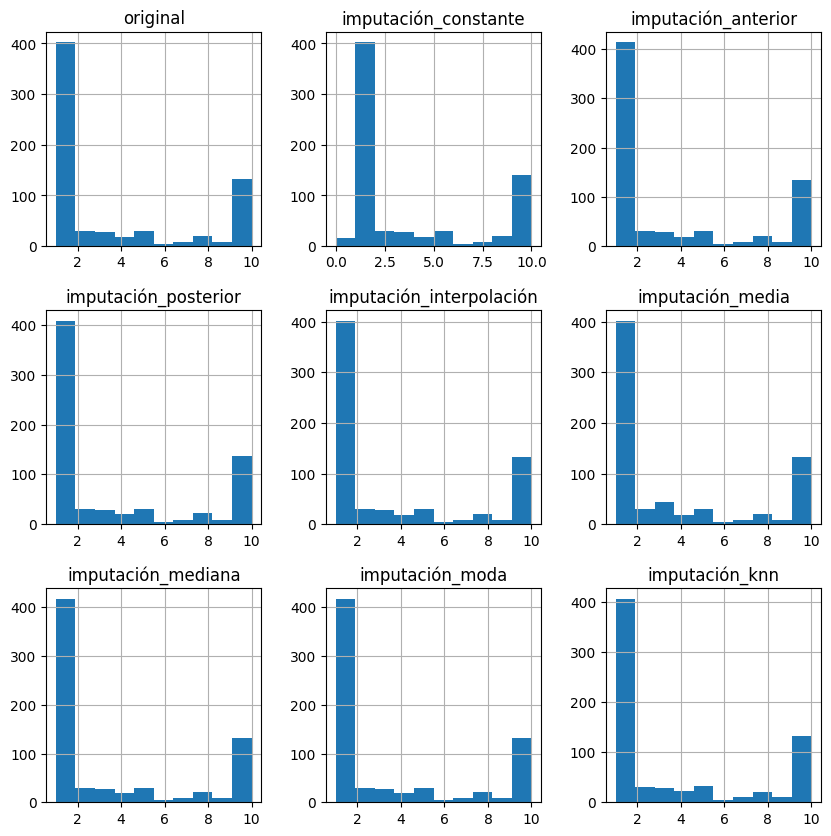

In [19]:
df_bare_nuclei = pd.DataFrame({'original': df['bare_nuclei'],
                               'imputación_constante': new_df_1['bare_nuclei'],
                                'imputación_anterior': new_df_2['bare_nuclei'],
                                'imputación_posterior': new_df_3['bare_nuclei'],
                                'imputación_interpolación': new_df_4['bare_nuclei'],
                                'imputación_media': new_df_5[:,6],
                                'imputación_mediana': new_df_6[:,6],
                                'imputación_moda': new_df_7[:,6],
                                'imputación_knn': new_df_8[:,6]})
                                
df_bare_nuclei = df_bare_nuclei.apply(pd.to_numeric)
df_bare_nuclei.hist(figsize=(10,10))
plt.show()

Como podemos observar, al haber pocos valores faltantes, no hay un cambio drástico en la distribución de los datos, podemos observar en algunas estrategias ligeros cambios frente al resto, como son:
- Constante
- Media

El resto de estrategias, no muestran cambios significativos en la distribución de los datos.